In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# 导入TensorFlow和tf.keras
import tensorflow as tf
from tensorflow import keras

# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

可以看出一共有10种label

In [4]:
train_images.shape#打印训练集规模：6w张图片，每张都规模是28*28

(60000, 28, 28)

In [ ]:
len(train_labels)#每个图片一个label，一共有6w个label

可以大概看看这些个label的具体内容

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

showing train_images: 1 ; 2747


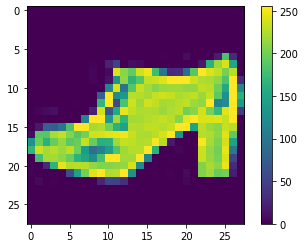

showing train_images: 2 ; 25125


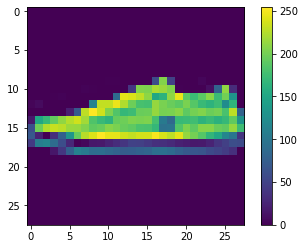

showing train_images: 3 ; 16938


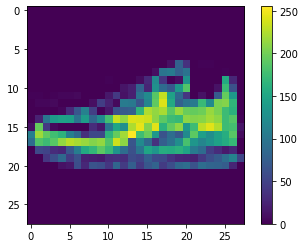

showing train_images: 4 ; 36159


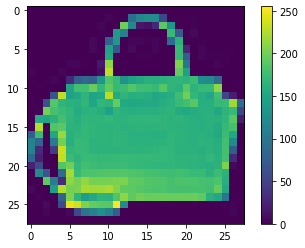

showing train_images: 5 ; 36001


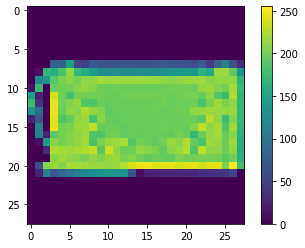

showing train_images: 6 ; 33341


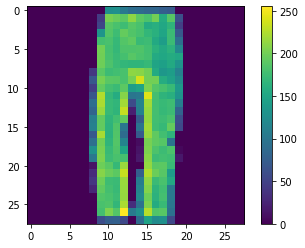

showing train_images: 7 ; 28017


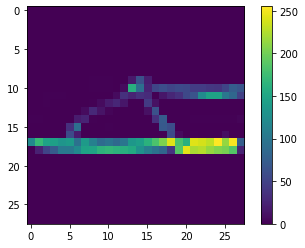

showing train_images: 8 ; 21344


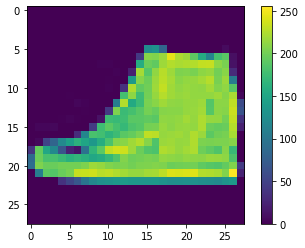

showing train_images: 9 ; 45415


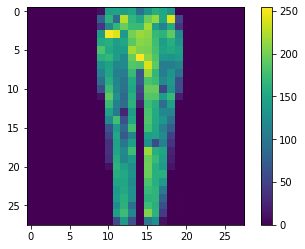

showing train_images: 10 ; 48276


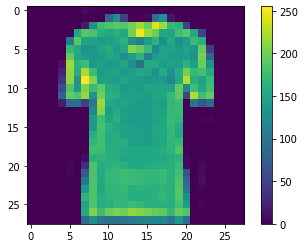

In [18]:
import random
for i in range(10):
    plt.figure()
    n=random.randint(0,60000)
    plt.imshow(train_images[n])
    plt.colorbar()
    plt.grid(False)
    print("showing train_images:",i+1,";",n)
    plt.show()

In [19]:
train_images = train_images / 255.0

test_images = test_images / 255.0

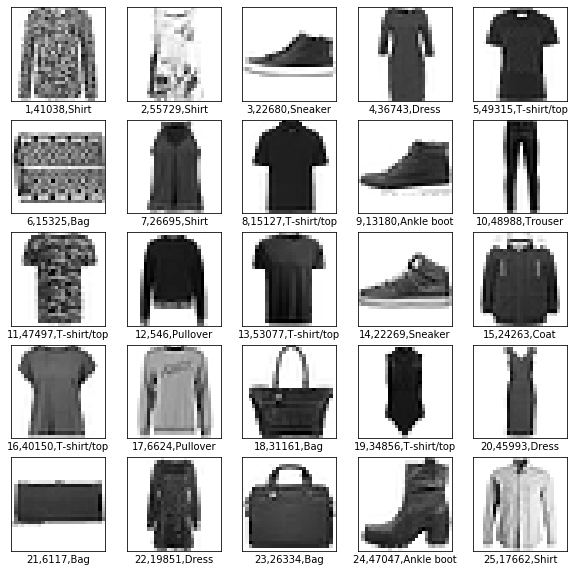

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    n=random.randint(0,60000)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[n], cmap=plt.cm.binary)
    txt=str(i+1)+","+str(n)+","+str(class_names[train_labels[n]])
    plt.xlabel(txt)
    '''
    txt=str(i)+","+str(n)+","+str(class_names[train_labels[n]])
    plt.text(txt)
    '''
plt.show()

网络中的第一层, tf.keras.layers.Flatten, 将图像格式从一个二维数组(包含着28x28个像素)转换成为一个包含着28 * 28 = 784个像素的一维数组。可以将这个网络层视为它将图像中未堆叠的像素排列在一起。这个网络层没有需要学习的参数;它仅仅对数据进行格式化。

在像素被展平之后，网络由一个包含有两个tf.keras.layers.Dense网络层的序列组成。他们被称作稠密链接层或全连接层。 第一个Dense网络层包含有128个节点(或被称为神经元)。第二个(也是最后一个)网络层是一个包含10个节点的softmax层—它将返回包含10个概率分数的数组，总和为1。每个节点包含一个分数，表示当前图像属于10个类别之一的概率。

keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    
    #keras.layers.Conv2D(128, 4),
    
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

'''
model = keras.Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='same',
                        input_shape=input_shape))

model.add(keras.layers.Conv2D(32, (kernel_size[0], kernel_size[1]),
                        padding='same',
                        input_shape=input_shape)) # 卷积层1
model.add(Activation('relu')) #激活层
model.add(keras.layers.Conv2D(32, (kernel_size[0], kernel_size[1]))) #卷积层2
model.add(Activation('relu')) #激活层
model.add(MaxPooling2D(pool_size=pool_size)) #池化层
model.add(Dropout(0.25)) #神经元随机失活
model.add(Flatten()) #拉成一维数据
model.add(Dense(128)) #全连接层1
model.add(Activation('relu')) #激活层
model.add(Dropout(0.5)) #随机失活
model.add(Dense(nb_classes)) #全连接层2
model.add(Activation('softmax')) #Softmax评分
'''

"\nmodel = keras.Sequential()\n\nmodel.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],\n                        border_mode='same',\n                        input_shape=input_shape))\n\nmodel.add(keras.layers.Conv2D(32, (kernel_size[0], kernel_size[1]),\n                        padding='same',\n                        input_shape=input_shape)) # 卷积层1\nmodel.add(Activation('relu')) #激活层\nmodel.add(keras.layers.Conv2D(32, (kernel_size[0], kernel_size[1]))) #卷积层2\nmodel.add(Activation('relu')) #激活层\nmodel.add(MaxPooling2D(pool_size=pool_size)) #池化层\nmodel.add(Dropout(0.25)) #神经元随机失活\nmodel.add(Flatten()) #拉成一维数据\nmodel.add(Dense(128)) #全连接层1\nmodel.add(Activation('relu')) #激活层\nmodel.add(Dropout(0.5)) #随机失活\nmodel.add(Dense(nb_classes)) #全连接层2\nmodel.add(Activation('softmax')) #Softmax评分\n"

编译模型
在模型准备好进行训练之前，它还需要一些配置。这些是在模型的编译(compile)步骤中添加的:

损失函数 —这可以衡量模型在培训过程中的准确程度。 我们希望将此函数最小化以"驱使"模型朝正确的方向拟合。
优化器 —这就是模型根据它看到的数据及其损失函数进行更新的方式。
评价方式 —用于监控训练和测试步骤。以下示例使用准确率(accuracy)，即正确分类的图像的百分数。

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

训练模型
训练神经网络模型需要以下步骤:

将训练数据提供给模型 - 在本案例中，他们是train_images和train_labels数组。
模型学习如何将图像与其标签关联
我们使用模型对测试集进行预测, 在本案例中为test_images数组。我们验证预测结果是否匹配test_labels数组中保存的标签。
通过调用model.fit方法来训练模型 — 模型对训练数据进行"拟合"。

In [39]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4978 - acc: 0.8256
Epoch 2/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3750 - acc: 0.8626
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3387 - acc: 0.8764
Epoch 4/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3123 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2966 - acc: 0.8906


In [ ]:
使用测试集进行模型评估

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.3783 - acc: 0.8653
Test accuracy: 0.8653


In [64]:
predictions = model.predict(test_images)

In [65]:
predictions[0]

array([0.13217203, 0.13783592, 0.13145836, 0.06069435, 0.06875829,
       0.21532884, 0.09096649, 0.03824735, 0.05894256, 0.06559582],
      dtype=float32)

In [66]:
np.argmax(predictions[0])

9

In [67]:
test_labels[0]

9

将结论可视化

In [69]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

选取可视化测试样例为0号样本

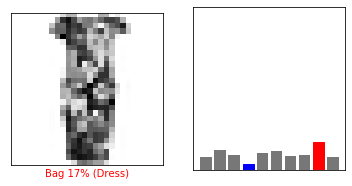

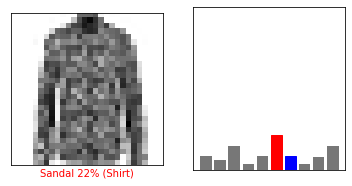

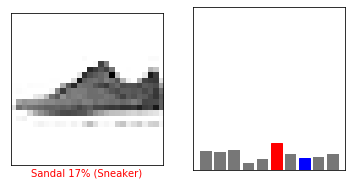

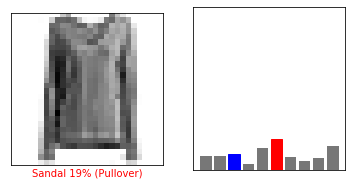

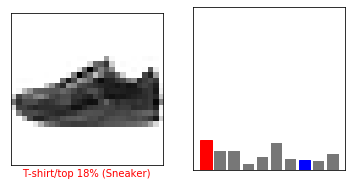

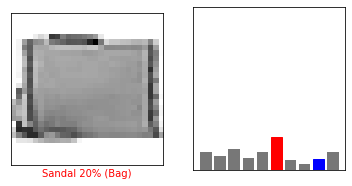

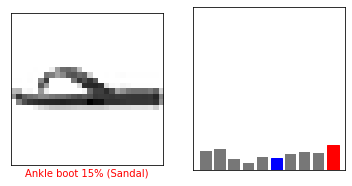

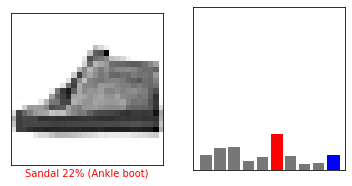

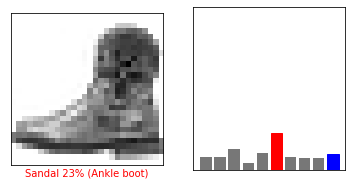

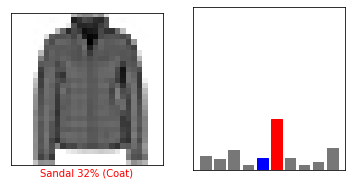

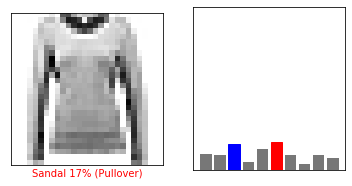

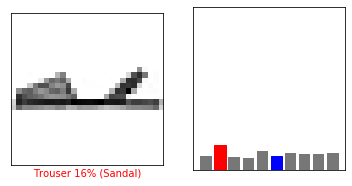

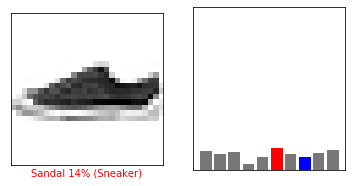

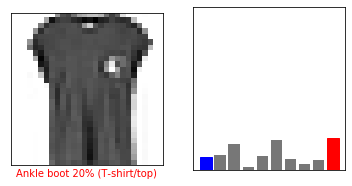

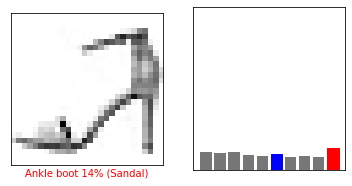

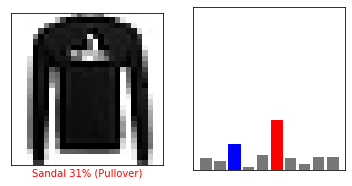

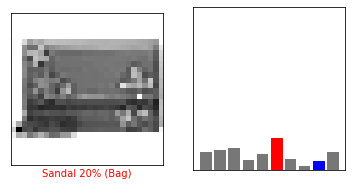

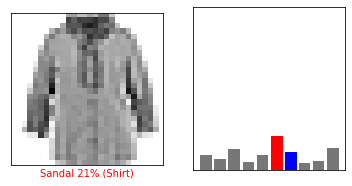

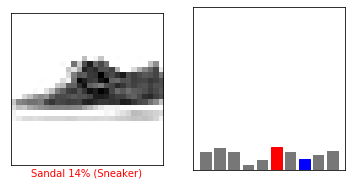

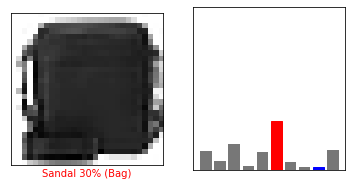

In [75]:
for i in range(100,120):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions, test_labels)
    plt.show()

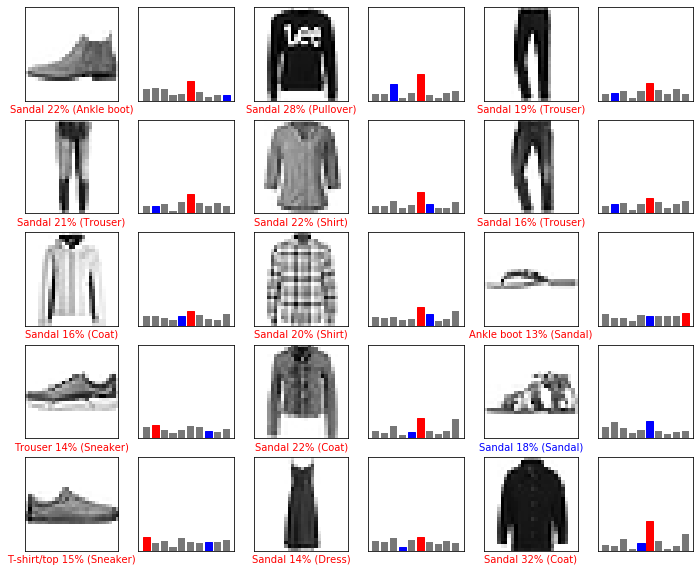

In [76]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()